In [1]:
#适应度函数
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def f(x, y):
    x_group = 0
    y_group = 0
    for i in range(1,6):
        x_group += i*np.cos((i+1)*x+i)
    for i in range(1,6):
        y_group += i*np.cos((i+1)*y+i)
    return x_group*y_group

In [2]:
#编码
import numpy as np
def incode():
    character = ['0','1']
    return np.random.choice(character,size=10)

In [3]:
def decode(s:np.array):
    s1 = s[0:5]
    s2 = s[5:10]
    str1 = ''.join(s1)
    str2 = ''.join(s2)
    factor1 = 0 + int(str1,2)*(10-0)/(2**5-1)
    factor2 = 0 + int(str2,2)*(10-0)/(2**5-1)
    return factor1,factor2

In [4]:
#计算适应值，并计算适应值的总值
def funandsum(popu_value):
    popu_fun = []
    for i in popu_value:
        x,y =decode(i)
        # print(x,y)
        popu_fun.append(f(x,y))
    value_sum = sum(popu_fun)
    return (popu_fun,value_sum)

In [5]:
#初始化种群数目，N为种群数目
def population(N:int):
    popu_value = [incode() for i in range(N)]
    # print(popu_value)
    return popu_value

In [6]:
#选择，使用圆盘赌方法
#返回一个优秀个体
#popu_value是选择前的种群
def select(popu_value,popu_fun,popu_fun_sum):
    #popu_fun是待选择种群的适应度值
    # popu_fun = funandsum(popu_value)[0]
    # popu_fun_sum = sum(popu_fun)
    #popu_fun_prob是每个种群 适应度比例
    popu_fun_prob = [i/popu_fun_sum for i in popu_fun]
    #popu_fun_prob_cumu是适应度比例累计和
    popu_fun_prob_cumu = np.cumsum(popu_fun_prob)
    # print(popu_fun_prob)
    index = np.random.uniform(0,1)
    for i,prob in enumerate(popu_fun_prob_cumu):
        if index<prob: return popu_value[i]

In [7]:
#交叉
#参数为两个种群中的个体
def mate(male:np.array,female:np.array):
    child1 = np.copy(male)
    child2 = np.copy(female)
    index1,index2 = np.random.randint(0,10,2)
    if index1>index2:
        index1,index2 = index2,index1
    print(index1,index2)
    child1[index1:index2] = female[index1:index2]
    child2[index1:index2] = male[index1:index2]
    return child1,child2

In [8]:
#变异
def change(x:np.array,prob:float):
    #单点变异
    new_x = np.copy(x)
    if np.random.rand()<=prob:
        index = np.random.randint(0,10)
        if x[index] == '0':
            new_x[index]= '1'
        else:
            new_x[index] = '0'
    return new_x

In [9]:
def sort_index(popu_value):
    new_list = np.copy(popu_value)
    fun_list=funandsum(popu_value=new_list)[0]
    one_zip = list(zip(fun_list,new_list))
    one_zip.sort(key=lambda x:x[0], reverse=True)
    result = [x[1] for x in one_zip]
    return result

In [16]:
def revolution(gen=500,popu_num=50,mate_prob = 0.6,change_prob = 0.1):
    #种群中共有四十个个体
    popu_value = population(popu_num)

    result=[]
    for i in range(gen):
        #计算每个个体的适应值和适应值总值
        fun_list,fun_sum=funandsum(popu_value=popu_value)
        #取出两个较好值
        goodone = select(popu_value,fun_list,fun_sum)
        goodtwo = select(popu_value,fun_list,fun_sum)
        
        #交叉
        for k in range(len(popu_value)):
            if np.random.rand(0,1)<mate_prob:
                child1,child2 = mate(male=goodone,female=goodtwo)
                popu_value.append(child1)
                popu_value.append(child2)
        popu_value = sort_index(popu_value)[0:popu_num]
        best=popu_value.pop(0)
        #变异
        for k in range(len(popu_value)):
            popu_value[k] = change(popu_value[k],change_prob)
        popu_value.append(best)
        #选择
        popu_value = sort_index(popu_value)[0:popu_num]
        x,y = decode(popu_value[0])
        result.append(f(x,y))
    return (decode(popu_value[0]),result)


In [17]:

def function_picture(result):
    x = np.linspace(0, 7, 100)
    y = np.linspace(0, 7, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # 标记一个点
    point_x = result[0][0]
    point_y = result[0][1]
    point_z = result[1][-1]
    ax.scatter(point_x, point_y, point_z, color='red', s=50)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('')

    plt.show()


In [19]:
def gener_picture(result):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    # 生成随机数据
    x = np.array(range(500))
    y = np.array(result[1])
    # 画折线图
    plt.plot(x, y, marker='o')  # 使用圆点标记
    plt.title('最优个体结果图')
    plt.xlabel('迭代次数')
    plt.ylabel('最大函数值')
    plt.show()


In [20]:
def main():
    result = revolution()
    gener_picture(result)
    function_picture(result)
    print('最佳点：',result[0],'   ','最大函数值：', result[-1][-1])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6408\2645198197.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.random.rand(0,1)<mate_prob:


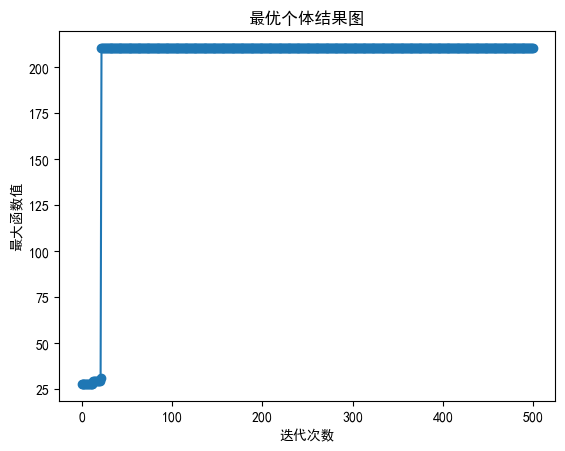

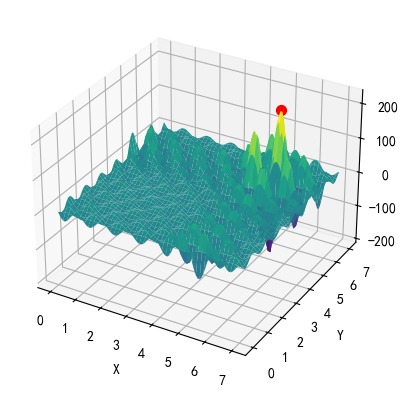

最佳点： (5.483870967741935, 5.483870967741935)     最大函数值： 210.47724538344193


In [28]:
main()